# A304_SRO_NGO_Hall_150K_p1T_to_n1T

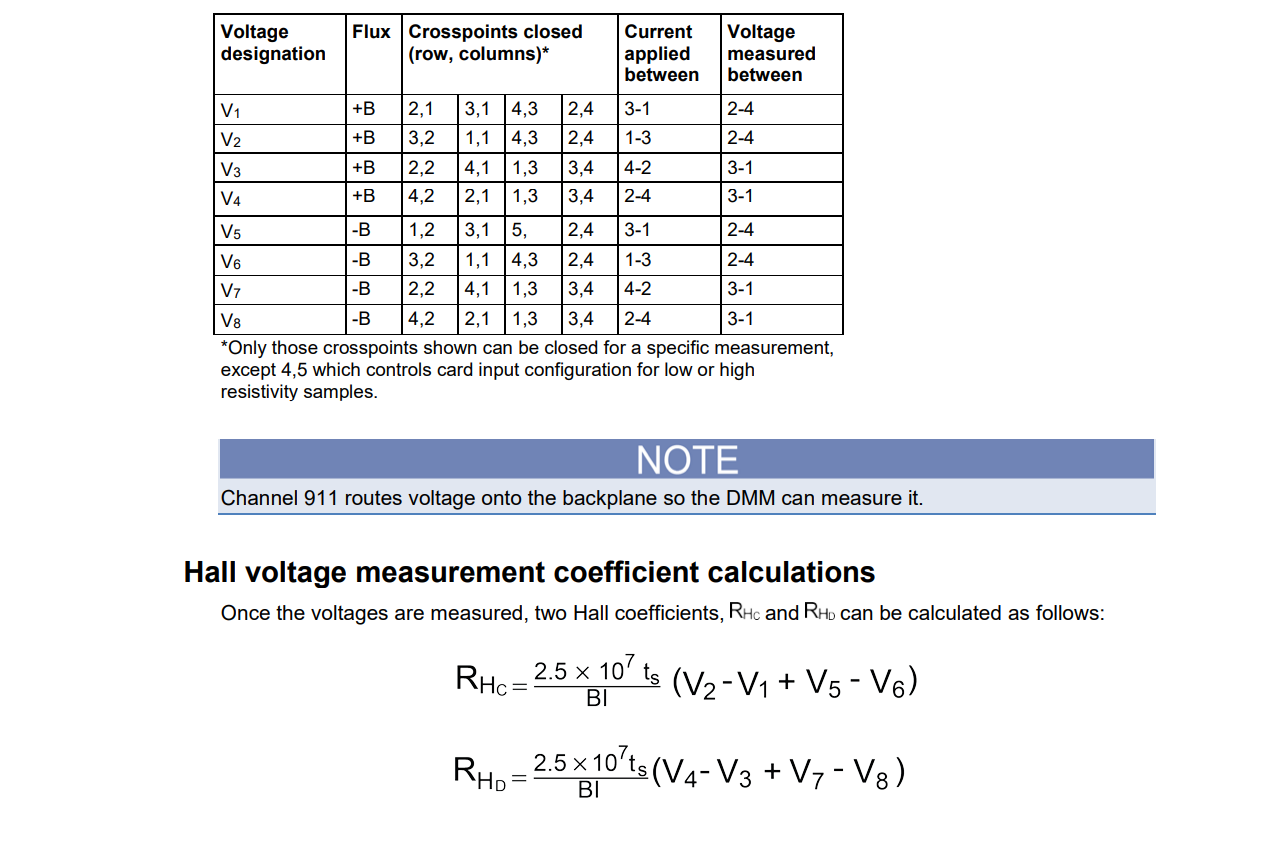

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [26]:
filename='C:\\Users\\Admin\\Desktop\\Data\\4_june_2023\\A304_SRO_NGO_Hall_150K_p1T_n1T.csv'
df = pd.read_csv(filename, names=["I", "B","T", "V1", "V2", "V3", "V4",'Rel_value'])
df['multiplier'] = 10**6
df
# NEED TO ADD MULITPLIER IN THE LABVIEW CODE

I             B           T          V1          V2          V3  \
0   0.001  10000.163916  149.999955  722.859899 -722.850114 -665.028010   
1   0.001   9000.428076  149.999718  722.381899 -722.403461 -667.634759   
2   0.001   8000.319312  149.999775  721.821086 -721.839173 -670.359476   
3   0.001   7000.433252  150.000228  721.030281 -721.056510 -673.234838   
4   0.001   6000.457422  150.000227  720.123711 -720.118877 -676.247377   
..    ...           ...         ...         ...         ...         ...   
61  0.001   6000.215039  150.000404  719.678009 -719.656601 -675.646043   
62  0.001   7000.420239  150.000307  720.553024 -720.564053 -672.631316   
63  0.001   8000.284180  150.000401  721.292027 -721.291754 -669.744882   
64  0.001   9000.358057  150.000388  721.869963 -721.875850 -667.036672   
65  0.001  10000.349512  149.999745  722.318178 -722.322298 -664.429343   

            V4     Rel_value  multiplier  
0   665.029572  7.017000e-07     1000000  
1   667.656685  6.886000e-07     1000000  
2   670.419964  6.716000e-07     1000000  
3   673.263956  6.517000e-07     1000000  
4   676.285128  6.501000e-07     1000000  
..         ...           ...         ...  
61  675.674654  6.328000e-07     1000000  
62  672.636869  6.287000e-07     1000000  
63  669.777624  6.342000e-07     1000000  
64  667.062849  6.201000e-07     1000000  
65  664.458290  6.148000e-07     1000000  

[66 rows x 9 columns]

### Converting B to integer B

In [27]:
def round_fun(a):
    step = 500
    if a > 0 : q = int((a+1)/step)
    else : q = int((a-1)/step)
    return q*step

df['B_int'] = list(map(round_fun,df['B'].values))
df = df[['I', 'B', 'B_int', 'T', 'V1', 'V2', 'V3', 'V4', 'Rel_value', 'multiplier']].copy()

In [28]:
df.head()

I             B  B_int           T          V1          V2          V3  \
0  0.001  10000.163916  10000  149.999955  722.859899 -722.850114 -665.028010   
1  0.001   9000.428076   9000  149.999718  722.381899 -722.403461 -667.634759   
2  0.001   8000.319312   8000  149.999775  721.821086 -721.839173 -670.359476   
3  0.001   7000.433252   7000  150.000228  721.030281 -721.056510 -673.234838   
4  0.001   6000.457422   6000  150.000227  720.123711 -720.118877 -676.247377   

           V4     Rel_value  multiplier  
0  665.029572  7.017000e-07     1000000  
1  667.656685  6.886000e-07     1000000  
2  670.419964  6.716000e-07     1000000  
3  673.263956  6.517000e-07     1000000  
4  676.285128  6.501000e-07     1000000

In [29]:
data_temp = df.copy()
data_temp['R1'] = df['V1']/(df['multiplier']*df['I'])
data_temp['R2'] = df['V2']/(df['multiplier']*df['I'])
data_temp['R3'] = df['V3']/(df['multiplier']*df['I'])
data_temp['R4'] = df['V4']/(df['multiplier']*df['I'])

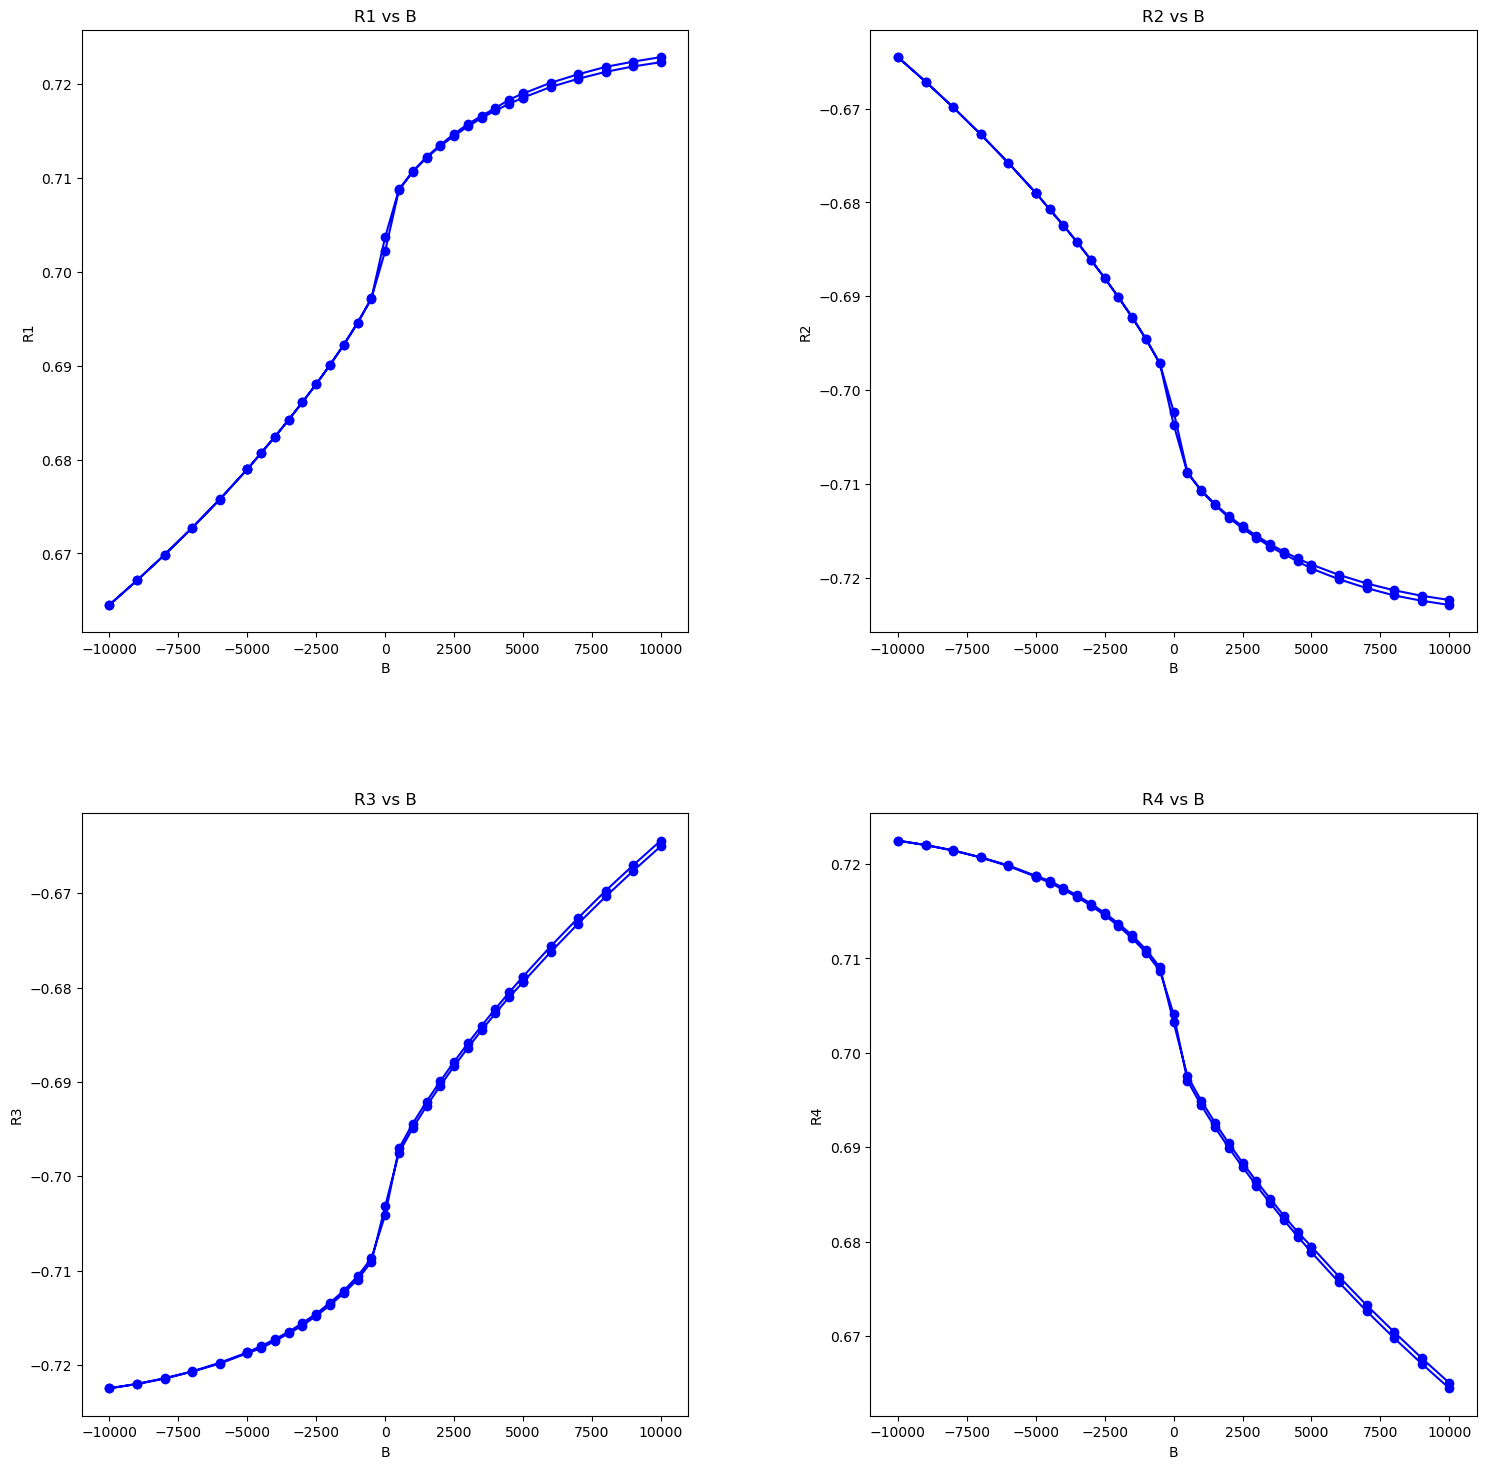

In [30]:
plt.figure(figsize=(18,18))
plt.subplot(2,2,1)
plt.plot(data_temp['B'],data_temp['R1'], 'bo-')
plt.title('R1 vs B')
plt.ylabel('R1')
plt.xlabel('B')
plt.subplot(2,2,2)
plt.plot(data_temp['B'],data_temp['R2'], 'bo-')
plt.title('R2 vs B')
plt.ylabel('R2')
plt.xlabel('B')
plt.subplot(2,2,3)
plt.plot(data_temp['B'],data_temp['R3'], 'bo-')
plt.title('R3 vs B')
plt.ylabel('R3')
plt.xlabel('B')
plt.subplot(2,2,4)
plt.plot(data_temp['B'],data_temp['R4'], 'bo-')
plt.title('R4 vs B')
plt.ylabel('R4')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.show()

## Spliting data into two subset (increasing and decreasing of magnetic field)

B_max to B_min --> Decreasing

B_min to B_max --> increasing


In [31]:
B_max = max(df['B_int'])
B_min = min(df['B_int'])
print(B_max, B_min)

10000 -10000


In [32]:
# finding index of first appearance of B_min
B_min_first_idx = 0
for i in range(len(df)):
    if df.iloc[i].B_int == B_min:
        B_min_first_idx = i
        break
B_min_first_idx

32

In [33]:
# now split it into two data set
df_dec = df.iloc[0:B_min_first_idx+1].copy()
df_inc = df.iloc[B_min_first_idx+1:].copy()

In [34]:
df_dec.head()

I             B  B_int           T          V1          V2          V3  \
0  0.001  10000.163916  10000  149.999955  722.859899 -722.850114 -665.028010   
1  0.001   9000.428076   9000  149.999718  722.381899 -722.403461 -667.634759   
2  0.001   8000.319312   8000  149.999775  721.821086 -721.839173 -670.359476   
3  0.001   7000.433252   7000  150.000228  721.030281 -721.056510 -673.234838   
4  0.001   6000.457422   6000  150.000227  720.123711 -720.118877 -676.247377   

           V4     Rel_value  multiplier  
0  665.029572  7.017000e-07     1000000  
1  667.656685  6.886000e-07     1000000  
2  670.419964  6.716000e-07     1000000  
3  673.263956  6.517000e-07     1000000  
4  676.285128  6.501000e-07     1000000

In [35]:
df_inc.head()

I             B  B_int           T          V1          V2  \
33  0.001 -10000.293799 -10000  150.000700  664.516233 -664.546902   
34  0.001  -9000.322949  -9000  150.000755  667.139106 -667.135142   
35  0.001  -8000.430469  -8000  150.000738  669.865422 -669.877422   
36  0.001  -7000.557422  -7000  150.000658  672.750447 -672.754116   
37  0.001  -6000.380005  -6000  150.000308  675.770461 -675.789999   

            V3          V4     Rel_value  multiplier  
33 -722.454965  722.501183  6.205000e-07     1000000  
34 -721.982417  722.022227  6.280000e-07     1000000  
35 -721.375769  721.426382  6.233000e-07     1000000  
36 -720.659462  720.713870  6.136000e-07     1000000  
37 -719.745232  719.788041  6.123000e-07     1000000

In [36]:
df_dec.drop_duplicates(subset='B_int', keep='first', inplace=True) # remove duplicates
df_inc.drop_duplicates(subset='B_int', keep='first', inplace=True) # remove duplicates

## Creating decreasing Field data

In [37]:
data = pd.merge(df_dec.assign(key=1), df_inc.assign(key=1), on='key').drop('key', axis=1) # cross product

data = data[data['B_int_x'] == -1*data['B_int_y']] # selecting 
data = data[['I_x','B_int_x','T_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data.rename({'I_x' : 'I', 'B_int_x' : 'B', 'T_x' : 'T', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)
data.reset_index(inplace = True, drop = True) # resetting index
data.head()

I      B           T          V1          V2          V3          V4  \
0  0.001  10000  149.999955  722.859899 -722.850114 -665.028010  665.029572   
1  0.001   9000  149.999718  722.381899 -722.403461 -667.634759  667.656685   
2  0.001   8000  149.999775  721.821086 -721.839173 -670.359476  670.419964   
3  0.001   7000  150.000228  721.030281 -721.056510 -673.234838  673.263956   
4  0.001   6000  150.000227  720.123711 -720.118877 -676.247377  676.285128   

           V5          V6          V7          V8  multiplier  
0  664.516233 -664.546902 -722.454965  722.501183     1000000  
1  667.139106 -667.135142 -721.982417  722.022227     1000000  
2  669.865422 -669.877422 -721.375769  721.426382     1000000  
3  672.750447 -672.754116 -720.659462  720.713870     1000000  
4  675.770461 -675.789999 -719.745232  719.788041     1000000

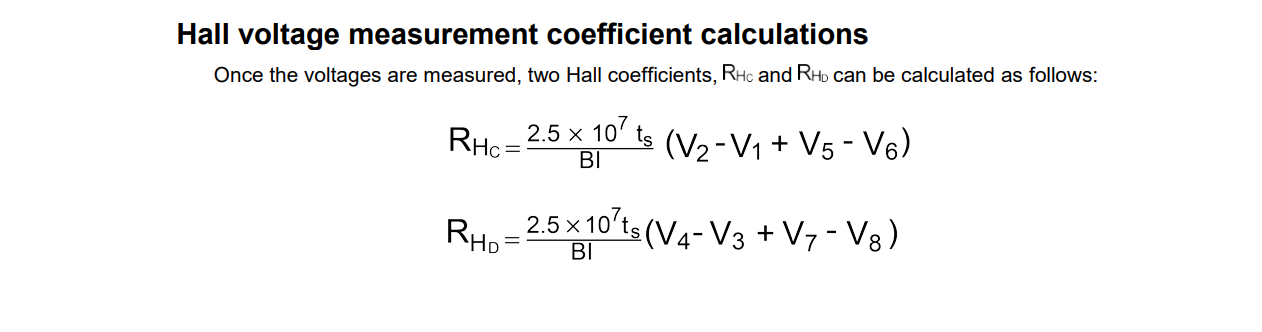
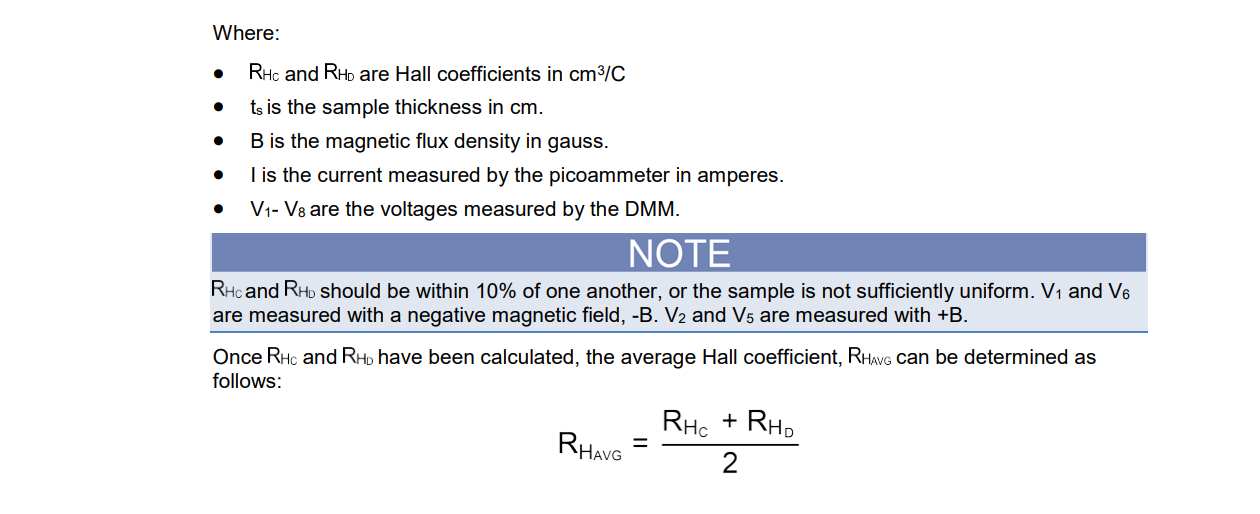

## Note : Here RHc & RHd we computed is Hall resistance, not Hall coefficients.

In [38]:
data['RHc'] = (data['V2'] - data['V1'] + data['V5'] - data['V6'])/(data['I']*data['multiplier'])
data['RHd'] = (data['V4'] - data['V3'] + data['V7'] - data['V8'])/(data['I']*data['multiplier'])
data['R'] = (data['RHc'] + data['RHd'])/2

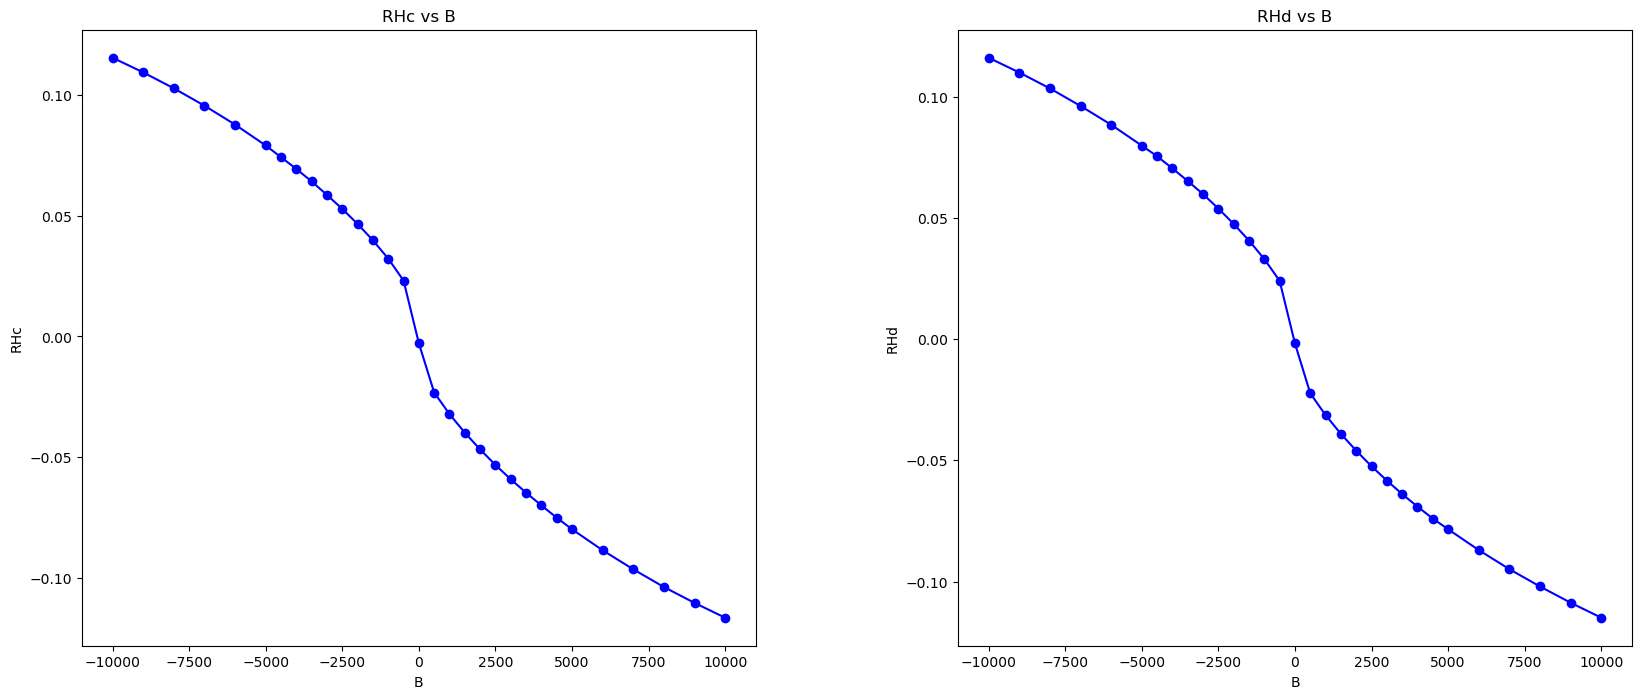

In [39]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(data['B'],data['RHc'],'bo-')
plt.title('RHc vs B')
plt.ylabel('RHc')
plt.xlabel('B')
plt.subplot(1,2,2)
plt.plot(data['B'],data['RHd'],'bo-')
plt.title('RHd vs B')
plt.ylabel('RHd')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0, wspace = 0.3)
plt.show()

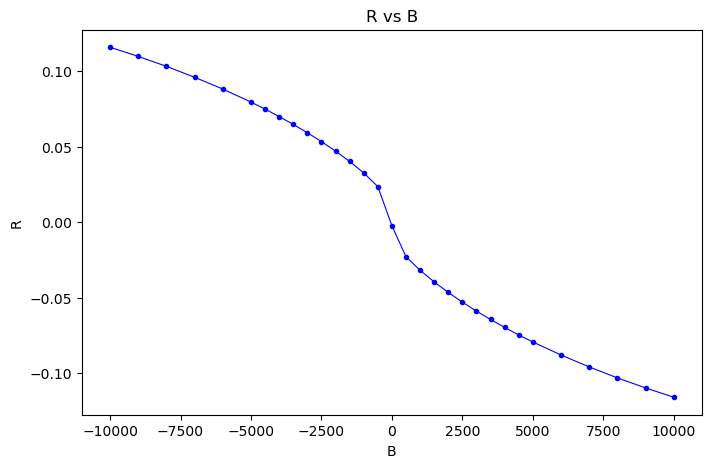

In [40]:
plt.figure(figsize=(8,5))
plt.plot(data['B'],data['R'],'bo-', linewidth=0.8, markersize=3)
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Creating Increasing Field data

In [41]:
data2 = pd.merge(df_inc.assign(key=1), df_dec.assign(key=1), on='key').drop('key', axis=1) # cross product

data2 = data2[data2['B_int_x'] == -1*data2['B_int_y']] # selecting 
data2 = data2[['I_x','B_int_x','T_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data2.rename({'I_x' : 'I', 'B_int_x' : 'B', 'T_x' : 'T', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)
data2.reset_index(inplace = True, drop = True) # resetting index
data2.head()

I      B           T          V1          V2          V3          V4  \
0  0.001 -10000  150.000700  664.516233 -664.546902 -722.454965  722.501183   
1  0.001  -9000  150.000755  667.139106 -667.135142 -721.982417  722.022227   
2  0.001  -8000  150.000738  669.865422 -669.877422 -721.375769  721.426382   
3  0.001  -7000  150.000658  672.750447 -672.754116 -720.659462  720.713870   
4  0.001  -6000  150.000308  675.770461 -675.789999 -719.745232  719.788041   

           V5          V6          V7          V8  multiplier  
0  722.859899 -722.850114 -665.028010  665.029572     1000000  
1  722.381899 -722.403461 -667.634759  667.656685     1000000  
2  721.821086 -721.839173 -670.359476  670.419964     1000000  
3  721.030281 -721.056510 -673.234838  673.263956     1000000  
4  720.123711 -720.118877 -676.247377  676.285128     1000000

### Hall resistance calculation

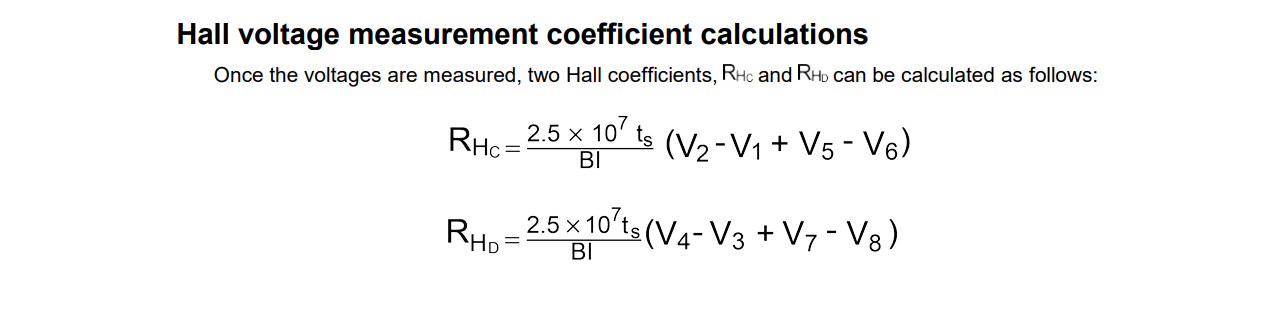

## Note : Here RHc & RHd we computed is Hall resistance, not Hall coefficients.

In [42]:
data2['RHc'] = (data2['V2'] - data2['V1'] + data2['V5'] - data2['V6'])/(data2['I']*data2['multiplier'])
data2['RHd'] = (data2['V4'] - data2['V3'] + data2['V7'] - data2['V8'])/(data2['I']*data2['multiplier'])

data2['R'] = (data2['RHc'] + data2['RHd'])/2

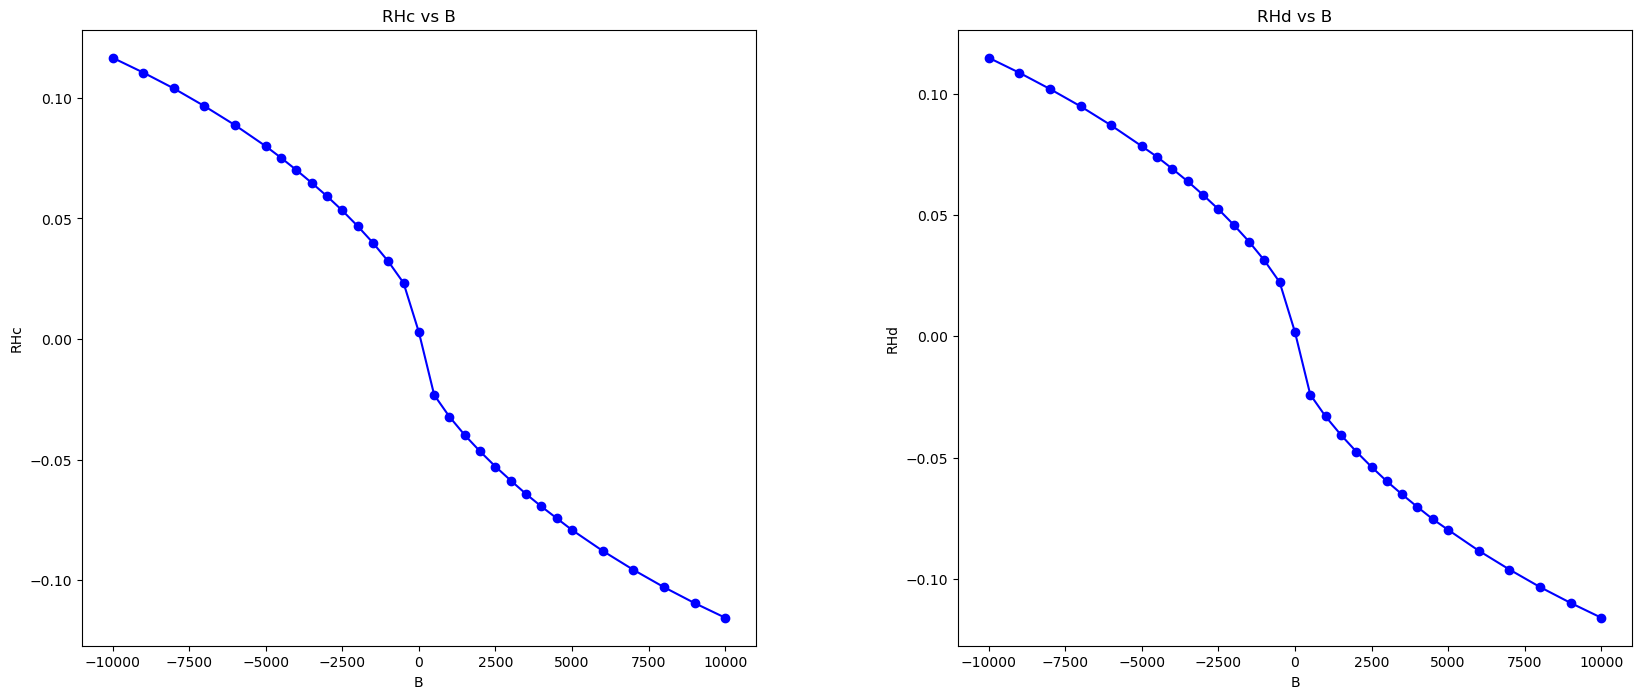

In [43]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(data2['B'],data2['RHc'],'bo-')
plt.title('RHc vs B')
plt.ylabel('RHc')
plt.xlabel('B')
plt.subplot(1,2,2)
plt.plot(data2['B'],data2['RHd'],'bo-')
plt.title('RHd vs B')
plt.ylabel('RHd')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0, wspace = 0.3)
plt.show()

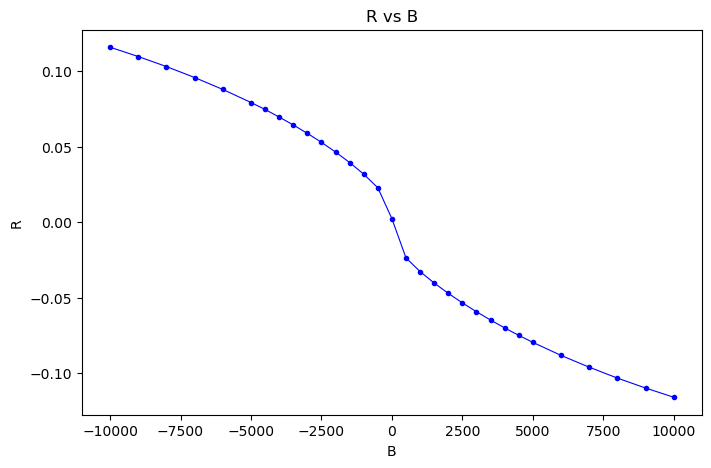

In [44]:
plt.figure(figsize=(8,5))
plt.plot(data2['B'],data2['R'],'bo-', linewidth=0.8, markersize=3)
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Plotting on same graph

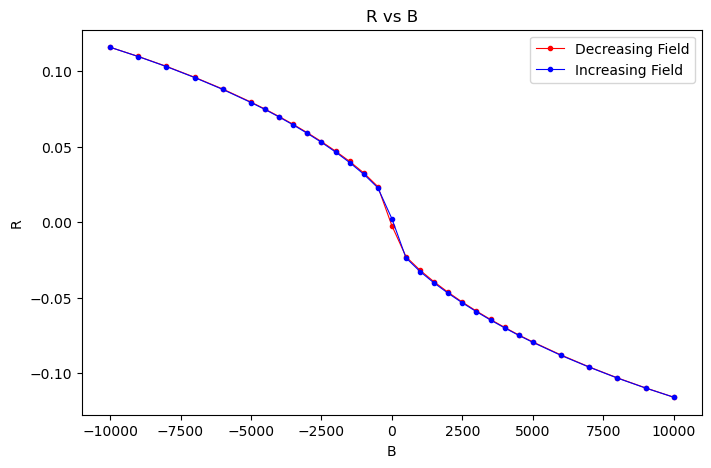

In [45]:
plt.figure(figsize=(8,5))
plt.plot(data['B'], data['R'], 'ro-', linewidth=0.8, markersize=3, label = 'Decreasing Field')
plt.plot(data2['B'],data2['R'],'bo-', linewidth=0.8, markersize=3, label = 'Increasing Field')
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.legend()
plt.show()